Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 17604.1055
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 17572.6426
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 17572.1191
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0391
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 8/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 9/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 11/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 12/50
1/1 [==============================] - 1s 1s/step - loss: 17572.0293
Epoch 13/50
1/1 [====================

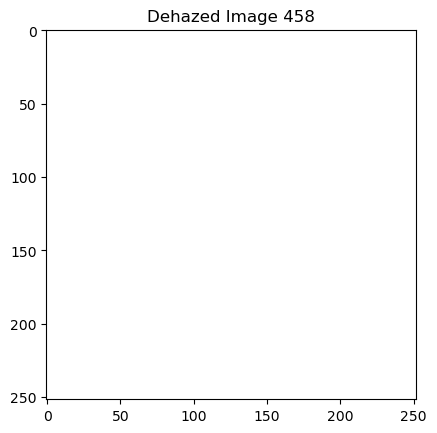

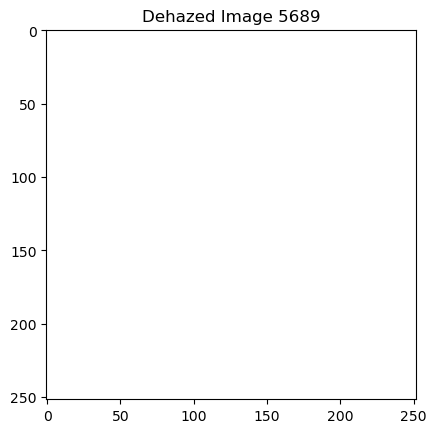

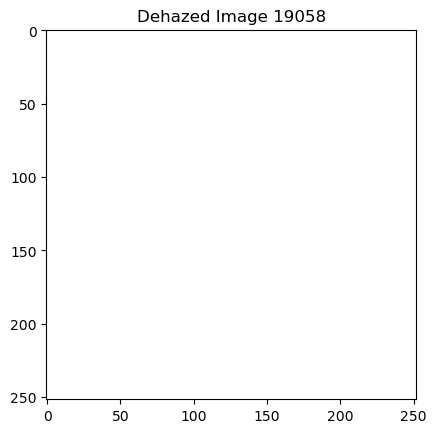

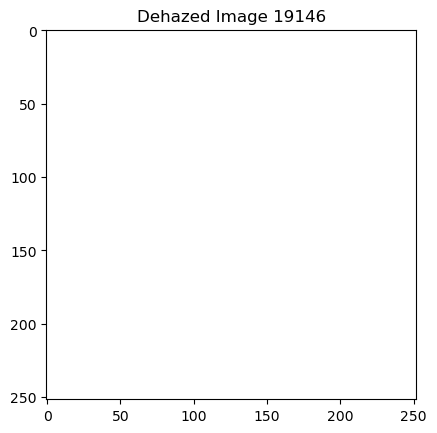

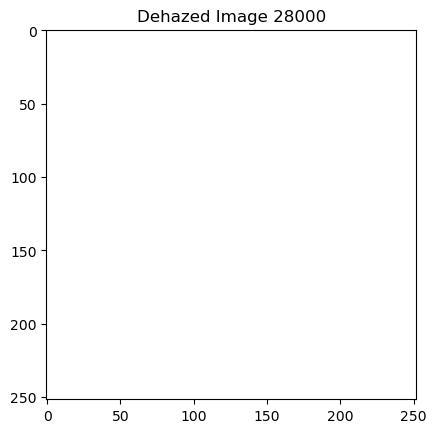

In [1]:
import numpy as np
import keras
import cv2
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Load hazy image data
Hazy_img_idx = [458,5689,19058,19146,28000]

for i in Hazy_img_idx:
    path = 'train-jpg/'
    filename = 'train_{}.jpg'.format(i)
    img = cv2.imread(path+filename)
# Resize image
    img = cv2.resize(img, (252, 252))
    cv2.imwrite(path+filename, img)
    hazy_imgs = np.array([cv2.imread('train-jpg/train_{}.jpg'.format(idx)) for idx in Hazy_img_idx])

# Create the CNN model
input_img = Input(shape=(None, None, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the hazy image data
autoencoder.fit(hazy_imgs, hazy_imgs, epochs=50, batch_size=8)

# Use the trained model to dehaze the images
dehazed_imgs = autoencoder.predict(hazy_imgs)

# Display the dehazed images
for i, img in enumerate(dehazed_imgs):
    plt.imshow(img)
    plt.title("Dehazed Image {}".format(Hazy_img_idx[i]))
    plt.show()